# 1. Errorbar limit selection

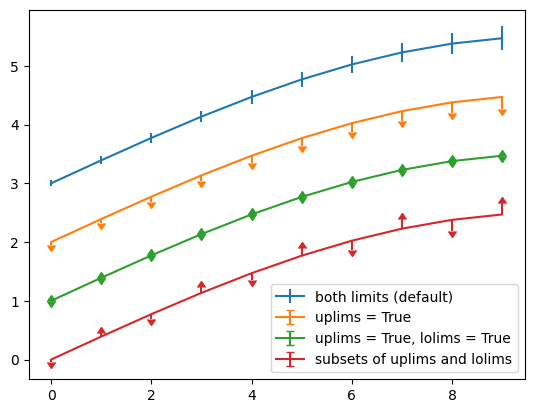

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10) # 오차 막대 크기

plt.errorbar(x, y + 3, yerr = yerr, label = 'both limits (default)')

plt.errorbar(x, y + 2, yerr = yerr, uplims = True, label = 'uplims = True')

plt.errorbar(x, y + 1, yerr = yerr, uplims = True, lolims = True,
             label = 'uplims = True, lolims = True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr = yerr, uplims = upperlimits, lolims = lowerlimits,
             label = 'subsets of uplims and lolims')

plt.legend(loc = 'lower right') # 그래프 오른쪽 아래 위치

**yerr**: y값의 오차 크기 설정 <br/>
**uplims**: 오차 막대 위쪽에 상한선 표시 <br/>
**lolims**: 오차 막대 아래쪽에 하한선 표시 <br/>

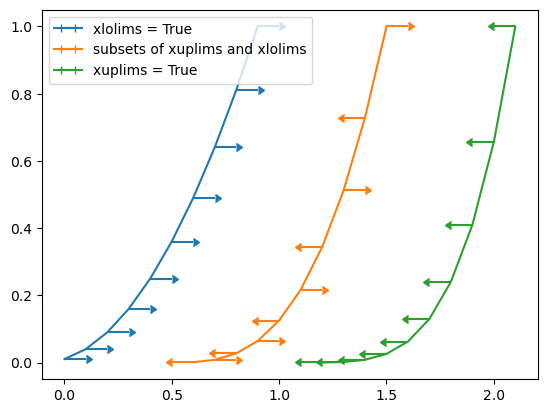

In [2]:
fig = plt.figure()
x = np.arange(10) / 10
y = (x + 0.1) ** 2

plt.errorbar(x, y, xerr = 0.1, xlolims = True, label = 'xlolims = True')
y = (x + 0.1) ** 3

plt.errorbar(x + 0.6, y, xerr = 0.1, xuplims = upperlimits, xlolims = lowerlimits,
             label = 'subsets of xuplims and xlolims')

y = (x + 0.1) ** 4
plt.errorbar(x + 1.2, y, xerr = 0.1, xuplims = True, label = 'xuplims = True')

plt.legend()
plt.show()

**xerr**: x값의오차 크기 설정 <br/>
**xlolims**: 오차 막대 왼쪽에 하한선 표시 <br/>
**xuplims**: 오차 막대에 대한 상한선 표시 <br/>

# 2. Errorbar subsampling

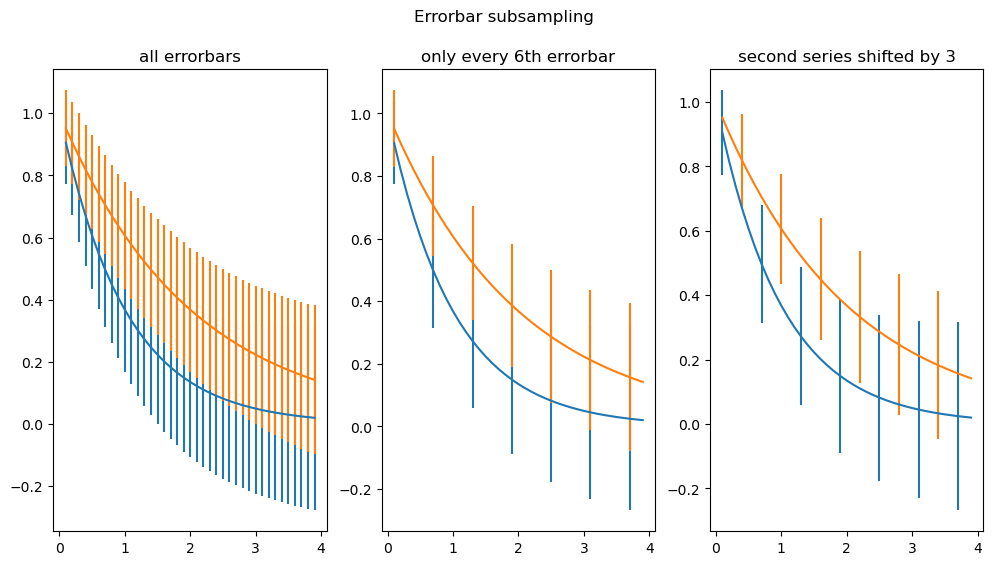

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# examplt data
x = np.arange(0.1, 4, 0.1)
y1 = np.exp(-1.0 * x) # 지수 함수 적용
y2 = np.exp(-0.5 * x)

# example variable error bar values
y1err = 0.1 + 0.1 * np.sqrt(x)
y2err = 0.1 + 0.1 * np.sqrt(x/2)

fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, sharex = True, 
                                    figsize = (12, 6))

ax0.set_title('all errorbars')
ax0.errorbar(x, y1, yerr = y1err)
ax0.errorbar(x, y2, yerr = y2err)

ax1.set_title('only every 6th errorbar')
ax1.errorbar(x, y1, yerr = y1err, errorevery = 6)
ax1.errorbar(x, y2, yerr = y2err, errorevery = 6)

ax2.set_title('second series shifted by 3')
ax2.errorbar(x, y1, y1err, errorevery = (0, 6))
ax2.errorbar(x, y2, y2err, errorevery = (3, 6))

fig.suptitle('Errorbar subsampling')
plt.show()

# 3. EventCollection Demo

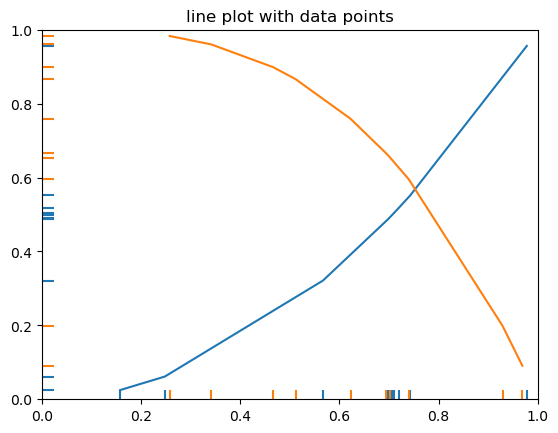

In [8]:
import matplotlib.pyplot as plt
from matplotlib.collections import EventCollection
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# create random data
xdata = np.random.random([2, 10])

# split the data into two parts
xdata1 = xdata[0, :]
xdata2 = xdata[1, :]

# sort the data so it makes clean curves
xdata1.sort()
xdata2.sort()

# create some y data points
ydata1 = xdata1 ** 2
ydata2 = 1 - xdata2 ** 3

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(xdata1, ydata1, color = 'tab:blue')
ax.plot(xdata2, ydata2, color = 'tab:orange')

# create the events marking the x data points
xevents1 = EventCollection(xdata1, color = 'tab:blue', linelength = 0.05)
xevents2 = EventCollection(xdata2, color = 'tab:orange', linelength = 0.05)

# create the events marking the y data points
yevents1 = EventCollection(ydata1, color = 'tab:blue', linelength = 0.05,
                           orientation = 'vertical')
yevents2 = EventCollection(ydata2, color = 'tab:orange', linelength = 0.05,
                           orientation = 'vertical')

# add the events to the axis
ax.add_collection(xevents1)
ax.add_collection(xevents2)
ax.add_collection(yevents1)
ax.add_collection(yevents2)

# set the limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

ax.set_title('line plot with data points')

# display the plot
plt.show()

**EventCollection**은 주어진 데이터 포인트를 그래프 상에 표시하기 위한 도구입니다. 일반적으로 데이터 포인트를 그래프에 표시할 때, 그저 점으로만 나타내면 모든 데이터를 구별하기 어렵거나 겹치는 경우가 있을 수 있습니다. 이런 문제를 해결하기 위해 사용됩니다. 데이터 포인트를 선이나 막대로 표시함으로써, 각 데이터의 위치와 값 사이의 관계를 시각적으로 더 잘 이해할 수 있게 됩니다.

# 4. Eventplot demo

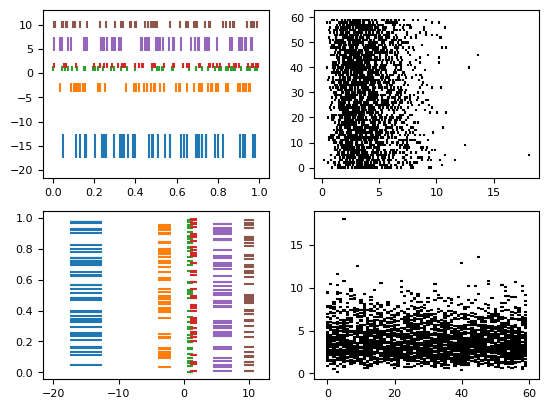

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['font.size'] = 8.0 # 폰트 크기

# Fixing random state for reproducibility
np.random.seed(19680801)

# create random data
data1 = np.random.random([6, 50]) # 2차원 배열 생성

# set different colors for each set of positions
colors1 = [f'C{i}' for i in range(6)]

# set different line properties for each set of positions
# note that some overlap
lineoffsets1 = [-15, -3, 1, 1.5, 6, 10]
linelengths1 = [5, 2, 1, 1, 3, 1.5]

fig, axs = plt.subplots(2, 2)

# create a horizontal plot
axs[0, 0].eventplot(data1, colors = colors1, lineoffsets = lineoffsets1,
                    linelengths = linelengths1)

# create a vertical plot
axs[1, 0].eventplot(data1, colors = colors1, lineoffsets = lineoffsets1,
                    linelengths = linelengths1, orientation = 'vertical')

# create another set of random data.
# the gamma distribution is only used for aesthetic purposes
data2 = np.random.gamma(4, size = [60, 50])

# use individual values for the parameters this time
# these values will be used for all data sets (except lineoffsets2, which
# sets the increment between each data set in this usage)
colors2 = 'black'
lineoffsets2 = 1
linelengths2 = 1

# create a horizontal plot
axs[0, 1].eventplot(data2, colors = colors2, lineoffsets = lineoffsets2,
                    linelengths = linelengths2)

# create a vertical plot
axs[1, 1].eventplot(data2, colors = colors2, lineoffsets = lineoffsets2,
                    linelengths = linelengths2, orientation = 'vertical')

plt.show()

**lineoffsets**: 데이터 포인트를 표시할 때 선의 위치를 조정하는 데 사용됩니다. <br/>
**linelengths**: 데이터 포인트를 표시할 때 선의 길이를 조정하는 데 사용됩니다.
**orientation**: 데이터 포인트의 표시 방향을 조정하는 데 사용됩니다. 'vertical'로 설정하면 데이터 포인트가 수직 방향으로 표시됩니다.

eventplot은 이벤트 데이터를 그래프로 표현하기 위해 사용됩니다. 이벤트 데이터는 특정 시간 또는 위치에서 발생한 이벤트의 발생 여부를 나타내는 데이터입니다. 이벤트 데이터를 그래프로 시각화하면 이벤트의 분포, 패턴, 간격 등을 쉽게 파악할 수 있습니다.

# 5. Filled polygon

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def koch_snowflake(order, scale = 10):
    """
    Return two list x, y of point coordinates of the koch snowflake.

    parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1) # start points
            p2 = np.roll(p1, shift = -1) # end points
            dp = p2 - p1 # connection vectors

            new_points = np.empty(len(p1) * 4, dtype = np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points
    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

**np.deg2rad(angles)**: angles 리스트에 저장된 각도 값을 라디안(radian)으로 변환합니다. 라디안은 각도를 호의 길이로 나타내는 각도의 단위입니다. <br/>
**np.roll**: 배열의 요소를 주어진 횟수만큼 회전시킵니다. shift 매개변수는 배열 요소를 회전시킬 방향과 횟수를 지정합니다. -1 값은 배열 요소를 왼쪽으로 1번 회전시킵니다. <br/>
**dtype=np.complex128**: 생성되는 배열의 데이터 유형을 지정합니다. np.complex128는 복소수 데이터 유형을 나타내며, 128비트 정밀도로 표현됩니다. <br/>
**np.empty**: 지정된 크기와 데이터 유형으로 빈 배열을 생성합니다. 생성된 배열은 초기화되지 않으며, 배열의 값은 메모리에 존재하던 이전 데이터의 잔재일 수 있습니다.

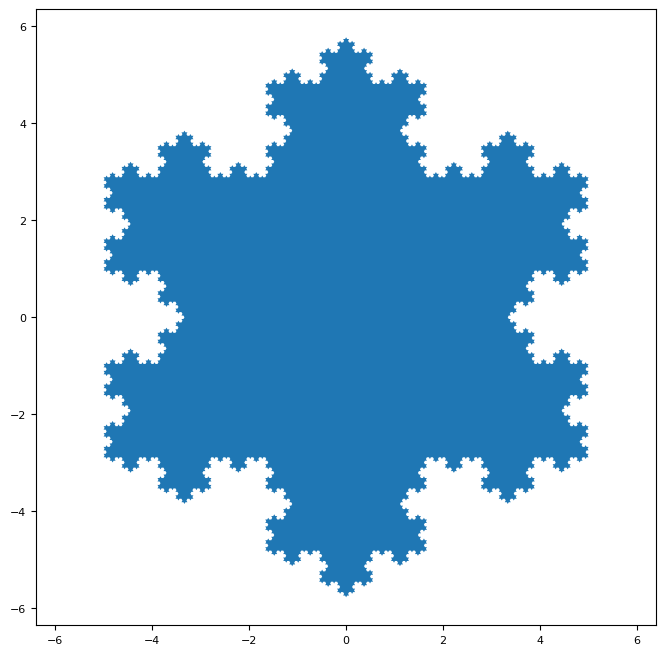

In [11]:
x, y = koch_snowflake(order = 5)

plt.figure(figsize = (8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()

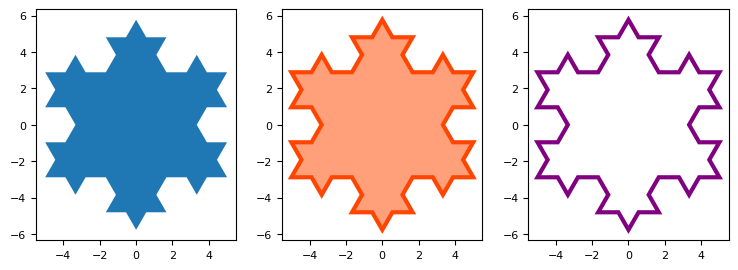

In [12]:
x, y = koch_snowflake(order = 2)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (9, 3),
                                    subplot_kw = {'aspect': 'equal'})
ax1.fill(x, y)
ax2.fill(x, y, facecolor = 'lightsalmon', edgecolor = 'orangered', linewidth = 3)
ax3.fill(x, y, facecolor = 'none', edgecolor = 'purple', linewidth = 3)

plt.show()